# **Modelling and Evaluating - RGB**

## Objectives
To develop, train, and evaluate a machine learning model for image classification, incorporating image augmentation and comprehensive performance analysis through various metrics and visualizations. The objective includes modifying class indices, plotting augmented images, creating and summarizing the model, and saving the trained model. Model performance will be assessed using accuracy, ROC curves, and classification reports, followed by plotting the confusion matrix and saving the evaluation results. The final output will also involve making predictions on a random image file.

## Inputs
* Images are taken from the test, train, validation folders and their subfolders.
```
└───inputs/ 
    └───potato_disease_dataset/ 
        ├───test/
        │   ├───healthy
        │   ├───early_blight
        │   └───late_blight                   
        ├───train/
        │   ├───healthy
        │   ├───early_blight
        │   └───late_blight          
        └───validation/
            ├───healthy
            ├───early_blight
            └───late_blight               
```
* Image shape embeddings.


## Outputs
- Image augmentation.
    - Plot augmented images for each dataset.
- Modify class indices to alter prediction in labels.
- Create a machine learning model and display its summary.
    - Train the model.
    - Save the model.
    - Plot the learning curve to show model performance.
        - Model A - generate separate plots for accuracy and loss.
        - Model B - create a comprehensive model history plot.
        - Model C - visualize model history using Plotly.
- Evaluate the model using a saved file.
    - Calculate accuracy.
    - Plot the ROC curve.
    - Generate a classification report for Model A.
    - Model B - provide a classification report including macro average and weighted average.
    - Model C - produce a synthetic classification report per label.
- Plot the confusion matrix.
- Save the evaluation results in a pickle file.
- Predict on a random image file.

---

## Import necessary packages for this notebook

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import joblib

%matplotlib inline


---

## Set Working Directory

As the notebooks are within a subfolder, we will need to change the working directory when running the notebook in the editor.

We need to change the working directory from its current folder to its parent folder.
* We access the current directory with `os.getcwd()`

In [2]:
current_dir = os.getcwd()
current_dir

'/workspace/ci-ms5-spudscan/jupyter_notebooks'

We want to make the parent of the current directory the new current directory.
* `os.path.dirname()` gets the parent directory
* `os.chir()` defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory.

In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/ci-ms5-spudscan'

---

## Set input directory
Set train, validation and test paths.

In [5]:
my_data_dir = 'inputs/potato_disease_dataset'
train_path = my_data_dir + '/train' 
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

print("Train path:", train_path)
print("Validation path:", val_path)
print("Test path:", test_path)

Train path: inputs/potato_disease_dataset/train
Validation path: inputs/potato_disease_dataset/validation
Test path: inputs/potato_disease_dataset/test


---

## Set output directory

Change the version number below to change output dir.

In [6]:
version = 'v2'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


---

## Set Label Names

In [7]:
labels = os.listdir(train_path)
print('Labels for the images are', labels)

Labels for the images are ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


---

### Set image shape

In [8]:
# Import saved image shape embedding
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

---

## Image data augmentation

### Initialize ImageDataGenerator

In [9]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

### Set Batch Size

In [10]:
batch_size = 16

### Augment datasets

#### Augment training image set

In [11]:
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='categorical',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 1506 images belonging to 3 classes.


{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

#### Augment validation image set

In [12]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='categorical',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 213 images belonging to 3 classes.


{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

#### Augment test image set

In [13]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='categorical',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Found 433 images belonging to 3 classes.


{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

### Plot augmented datasets

In [14]:
# Function to plot augmented datasets
def plot_augmented_images(dataset, title):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(6, 6))
    for i in range(3):
        for j in range(3):
            img, label = dataset.next()
            print(img.shape)
            axes[i, j].imshow(img[0])
            axes[i, j].axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

#### Plot augmented training image set

(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)


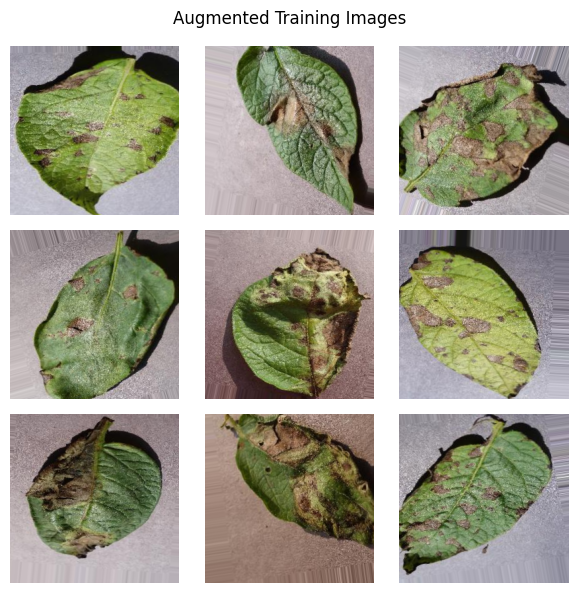

In [15]:
# Plot augmented training image set
plot_augmented_images(train_set, "Augmented Training Images")

#### Plot augmented validation image set

(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)


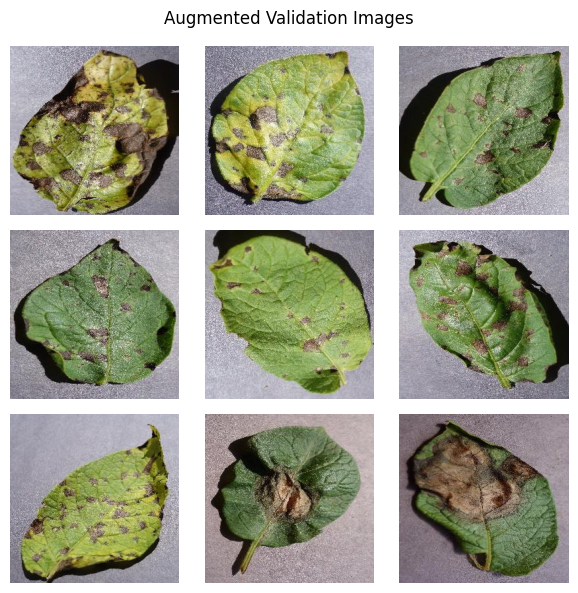

In [16]:
# Plot augmented validation image set
plot_augmented_images(validation_set, "Augmented Validation Images")

### Plot augmented test image set

(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)


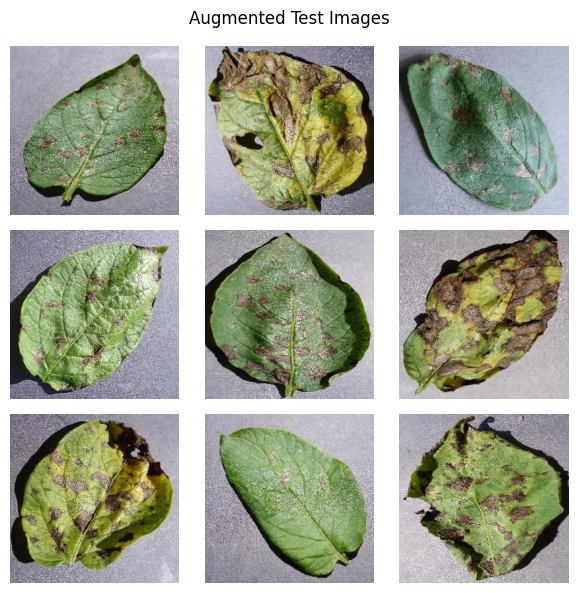

In [17]:
# Plot augmented test image set
plot_augmented_images(test_set, "Augmented Test Images")

### Save class indices

In [18]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v2/class_indices.pkl']

---

## Model Creation

### Define the CNN Model

In [19]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=image_shape))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

# Flatten the layers
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# Output Layer
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes for potato leaf diseases

# Summary of the custom model
model.summary()

2024-06-27 03:31:12.089819: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 127, 127, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       7